# Load librarys

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('ggplot')

# Load the images and create neural network model with TensorFlow 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load Data

In [3]:
# Dataset
import zipfile

# Extract the dataset
z = zipfile.ZipFile('C:/Git_Repos/NeuNe/archive.zip')

# Extract all the contents of zip file in current directory to a new folder named 'data'
z.extractall('data')


Number of images in tumor folder: 1683
Number of images in non_tumor folder: 2079


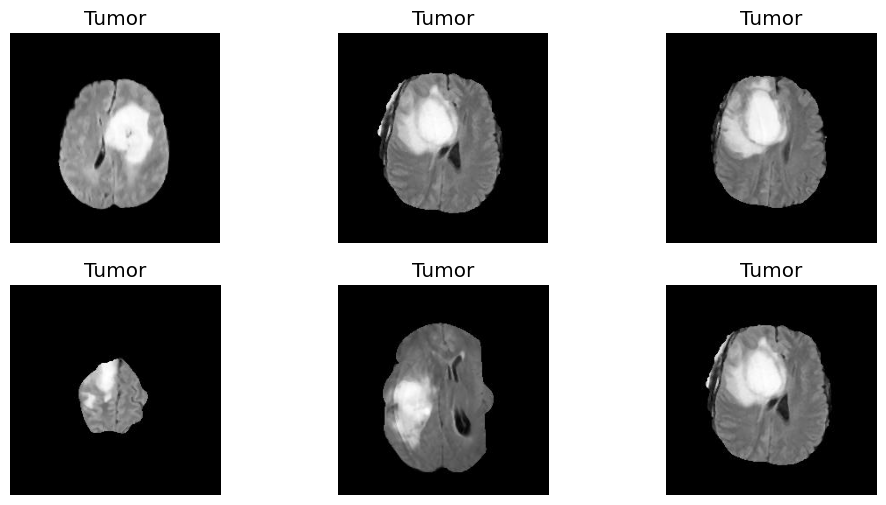

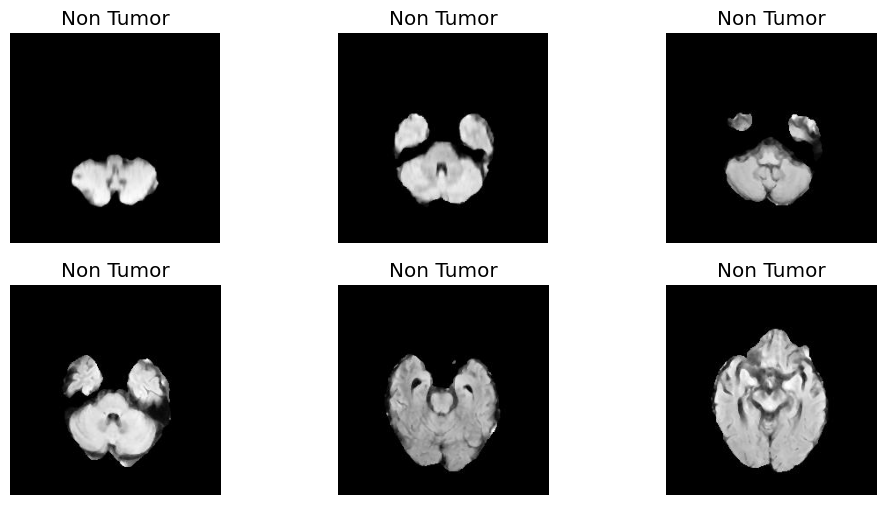

In [4]:
label_csv = pd.read_csv('data/Brain Tumor.csv')
label_csv.head()

image_folder = 'data/Brain Tumor/Brain Tumor'

# Save all the images to a folder named tumor and non_tumor
tumor_folder = 'data/labeled/tumor'
non_tumor_folder = 'data/labeled/non_tumor'

# Create the folders
os.makedirs(tumor_folder, exist_ok=True)
os.makedirs(non_tumor_folder, exist_ok=True)

# Copy the images to the folders
for index, row in label_csv.iterrows():
    image_path = os.path.join(image_folder, row['Image']+ '.jpg')
    if row['Class'] == 1:
        shutil.copy(image_path, tumor_folder)
    else:
        shutil.copy(image_path, non_tumor_folder)

# Check the number of images in each folder
print('Number of images in tumor folder:', len(os.listdir(tumor_folder)))
print('Number of images in non_tumor folder:', len(os.listdir(non_tumor_folder)))

# Display a few images from each folder
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(mpimg.imread(os.path.join(tumor_folder, os.listdir(tumor_folder)[i])))
    plt.title('Tumor')
    plt.axis('off')
plt.show()

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(mpimg.imread(os.path.join(non_tumor_folder, os.listdir(non_tumor_folder)[i])))
    plt.title('Non Tumor')
    plt.axis('off')
plt.show()


Found 3762 files belonging to 2 classes.


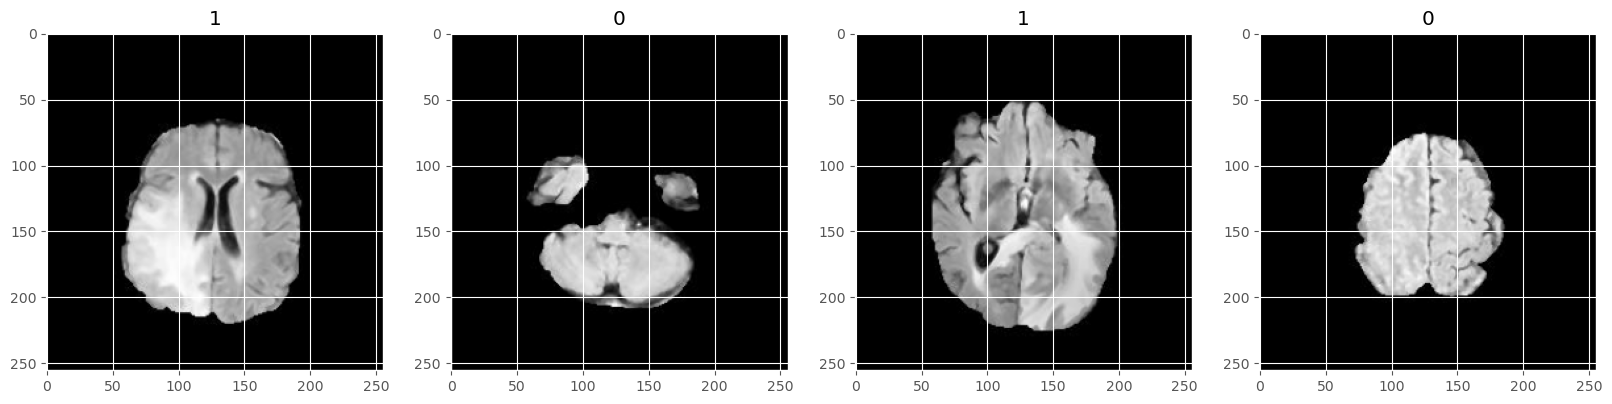

In [38]:
# building data pipeline
data = tf.keras.utils.image_dataset_from_directory('data/labeled')

# create a data iterator
data_iterator = data.as_numpy_iterator()

# creat a batch 
batch = data_iterator.next()

# images represented as numpy arrays
batch[0].shape

batch[1]

# plot the batch to see which class belongs to which image
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])



### Class 1 is Tumor 
### Class 2 is no Tumor

# Preprocessing

In [36]:
# pincip of scaling
# Just for testing don't run this code
"""
scaled = batch[0] / 255
scaled.max()
"""

1.0

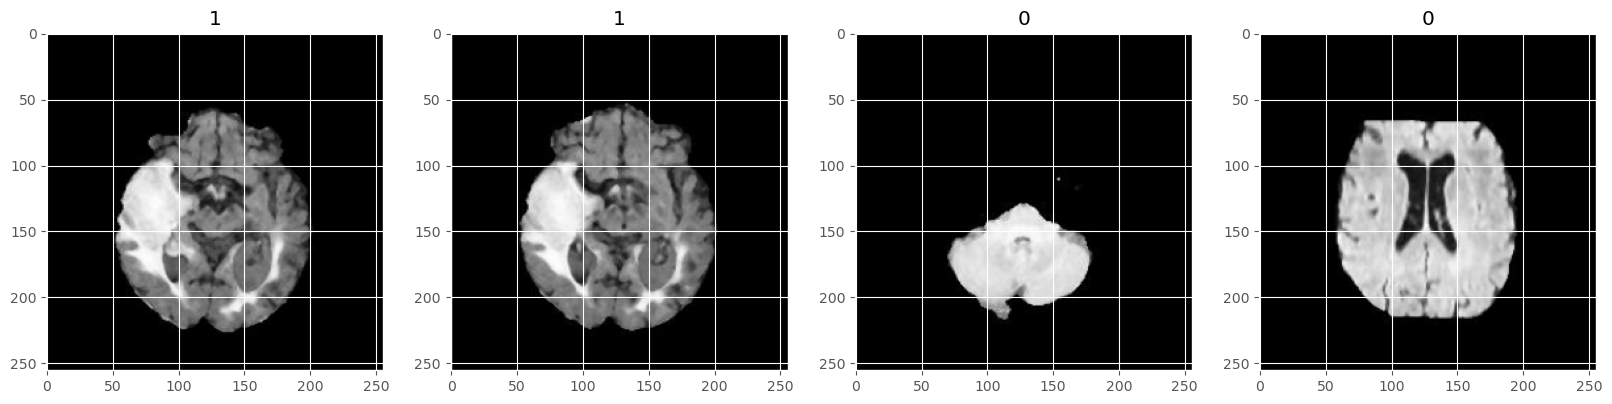

In [39]:
# scale the data pipline on the fly 
data = data.map(lambda x, y: (x/255, y))

scaled_interator = data.as_numpy_iterator()
scaled_batch = scaled_interator.next()
scaled_batch[0].min()

# display the batch
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[1][idx])

Split Data

In [50]:
# decide the size of the train, validation and test datasets
print(len(data))
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

train_size + val_size + test_size

118


118

In [52]:
# split the data into train, validation and test
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

print(len(train), len(val), len(test))


82 24 12


Modeling 

In [55]:
batch[0].shape

(32, 256, 256, 3)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 37s 431ms/step - accuracy: 0.7016 - loss: 0.6423 - val_accuracy: 0.8464 - val_loss: 0.4178
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 38s 468ms/step - accuracy: 0.8391 - loss: 0.3941 - val_accuracy: 0.8581 - val_loss: 0.3396
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 47s 569ms/step - accuracy: 0.8710 - loss: 0.3127 - val_accuracy: 0.8906 - val_loss: 0.2733
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 48s 587ms/step - accuracy: 0.9113 - loss: 0.2333 - val_accuracy: 0.9193 - val_loss: 0.2028
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 48s 586ms/step - accuracy: 0.9288 - loss: 0.1791 - val_accuracy: 0.9206 - val_loss: 0.1892
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 47s 574ms/step - accuracy: 0.9583 - loss: 0.1153 - val_accuracy: 0.9297 - val_loss: 0.1848
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 35s 422ms/step - accuracy: 0.9460 - loss: 0.1188 - val_accuracy: 0.9258 - val_loss: 0.2554
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 368ms/step - accuracy: 0.9693 - loss: 0.0746 - val_accu

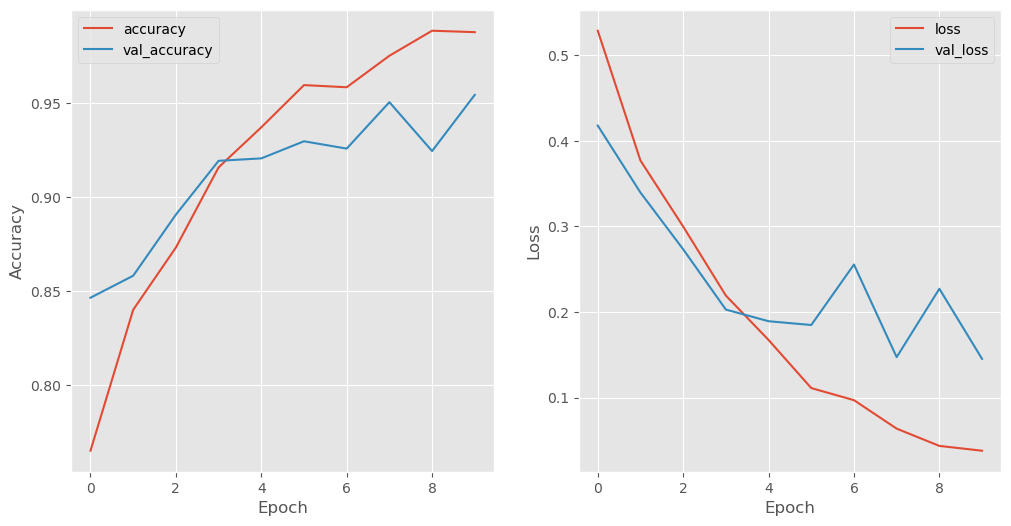

In [59]:

# Load the images
#train_data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
#train_data = train_data_gen.flow_from_directory('data/labeled', target_size=(150, 150), class_mode='binary', subset='training')
#val_data = train_data_gen.flow_from_directory('data/labeled', target_size=(150, 150), class_mode='binary', subset='validation')

# Create the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(train, validation_data=val, epochs=10, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Found 3011 images belonging to 2 classes.
Found 751 images belonging to 2 classes.
Epoch 1/10


c:\Users\noiri\.conda\envs\brain_tumor\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 24s 217ms/step - accuracy: 0.7574 - loss: 0.5255 - val_accuracy: 0.8748 - val_loss: 0.3304
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.8568 - loss: 0.3392 - val_accuracy: 0.8682 - val_loss: 0.3048
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.8699 - loss: 0.3094 - val_accuracy: 0.8482 - val_loss: 0.3953
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - accuracy: 0.8927 - loss: 0.2727 - val_accuracy: 0.9268 - val_loss: 0.2002
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 22s 228ms/step - accuracy: 0.9299 - loss: 0.1707 - val_accuracy: 0.9467 - val_loss: 0.1637
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 27s 283ms/step - accuracy: 0.9501 - loss: 0.1338 - val_accuracy: 0.9441 - val_loss: 0.1738
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 311ms/step - accuracy: 0.9700 - loss: 0.0803 - val_accuracy: 0.9467 - val_loss: 0.1592
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 31s 313ms/step - accuracy: 0.9709 - loss: 0.0762 - val_accuracy: 0.913

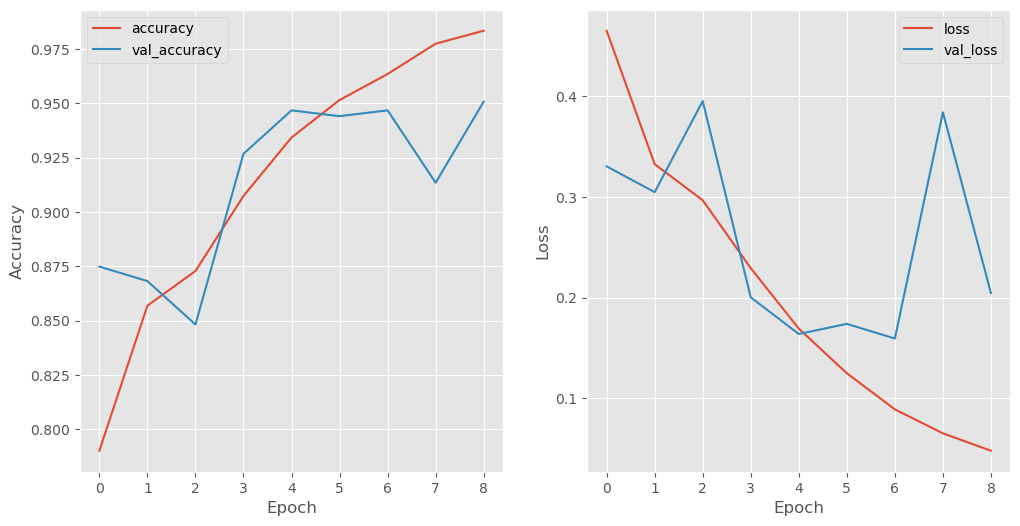

In [58]:
# Load the images
train_data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_data = train_data_gen.flow_from_directory('data/labeled', target_size=(150, 150), class_mode='binary', subset='training')
val_data = train_data_gen.flow_from_directory('data/labeled', target_size=(150, 150), class_mode='binary', subset='validation')

# Create the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Found 751 images belonging to 2 classes.
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


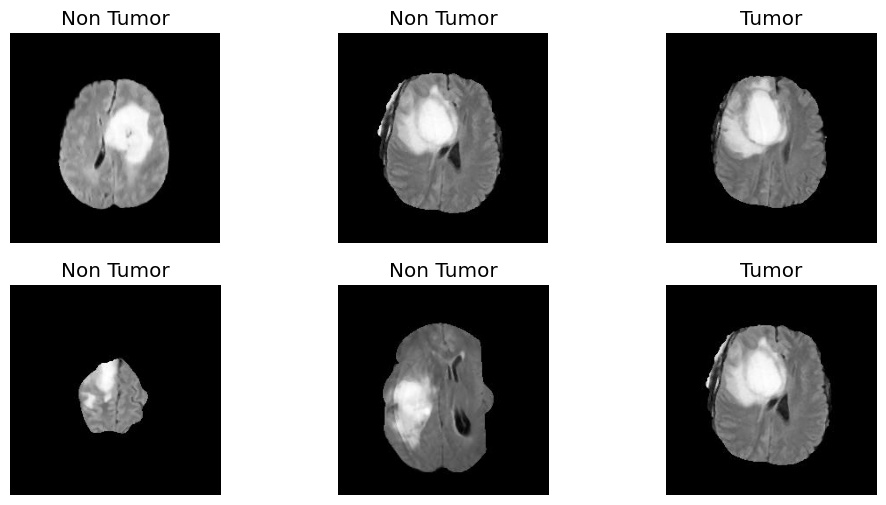

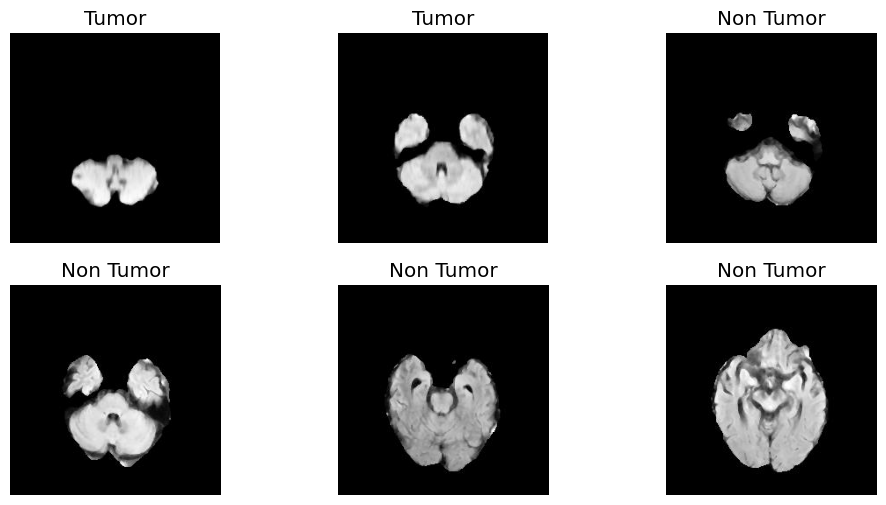

In [18]:
# Test the model on a few images from the dataset and check the predictions
test_data = train_data_gen.flow_from_directory('data/labeled', target_size=(150, 150), class_mode='binary', subset='validation')
predictions = model.predict(test_data)
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(mpimg.imread(os.path.join(tumor_folder, os.listdir(tumor_folder)[i])))
    plt.title('Tumor' if predictions[i] > 0.5 else 'Non Tumor')
    plt.axis('off')
plt.show()

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(mpimg.imread(os.path.join(non_tumor_folder, os.listdir(non_tumor_folder)[i])))
    plt.title('Tumor' if predictions[i+6] > 0.5 else 'Non Tumor')
    plt.axis('off')
plt.show()

